In [1]:
!pip install bnlearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bnlearn as bn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = bn.import_example(data='titanic')

train, test = train_test_split(df, test_size=0.2, random_state=42)

In [4]:
drop_list = ['Name', 'Age', 'Cabin', 'Ticket', 'Fare']
train = train.drop(columns=drop_list)
test = test.drop(columns=drop_list)

In [5]:
dfhot_train, dfnum_train = bn.df2onehot(train)
dfhot_test, dfnum_test = bn.df2onehot(test)


[df2onehot] >Auto detecting dtypes.


100%|██████████| 7/7 [00:00<00:00, 100.66it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 7/7 [00:00<00:00, 110.71it/s]


[df2onehot] >Total onehot features: 18

[df2onehot] >Auto detecting dtypes.


100%|██████████| 7/7 [00:00<00:00, 50.50it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 7/7 [00:00<00:00, 112.93it/s]

[df2onehot] >Total onehot features: 15


In [6]:
dfnum_train

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,1,1,1,1,3
1,0,2,1,1,1,3
2,0,3,1,1,1,3
3,0,3,1,2,1,3
4,0,3,0,5,3,3
...,...,...,...,...,...,...
707,1,3,0,1,1,3
708,0,1,1,1,1,3
709,0,3,1,3,1,3
710,1,1,0,2,3,3


In [7]:
dfnum_target = dfnum_train.pop('Survived')

In [8]:
Xtrain, Xval, Ztrain, Zval = train_test_split(dfnum_train, dfnum_target, test_size=0.2, random_state=0)
test_df = pd.concat([Xval, Zval], axis='columns')
dfnum = pd.concat([Xtrain, Ztrain], axis='columns')
dfnum

,Pclass,Sex,SibSp,Parch,Embarked,Survived
691,3,1,1,1,1,0
266,1,1,1,1,3,0
17,1,0,1,1,1,1
477,3,0,1,1,3,0
302,3,0,2,2,3,0
...,...,...,...,...,...,...
707,3,0,1,1,3,1
192,2,1,2,2,1,0
629,3,1,1,1,3,0
559,3,0,1,1,1,1


In [9]:
test_df

,Pclass,Sex,SibSp,Parch,Embarked,Survived
338,3,0,2,1,3,1
142,3,1,1,1,3,1
242,3,1,1,1,3,0
235,2,1,2,1,3,0
468,3,1,1,2,3,0
...,...,...,...,...,...,...
676,2,0,1,1,3,1
557,1,1,1,1,3,1
97,3,1,1,1,3,0
374,2,0,1,1,3,1


#### Training

In [10]:
NUM_CLIENTS = 3

split_data_list = np.array_split(dfnum, NUM_CLIENTS)

#### Train the centralized model

In [11]:
model = bn.structure_learning.fit(dfnum)
centralized_model = bn.parameter_learning.fit(model, dfnum)
centralized_CPDs = bn.print_CPD(centralized_model)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Pclass:
+-----------+----------+
| Pclass(1) | 0.295942 |
+-----------+----------+
| Pclass(2) | 0.292118 |
+-----------+----------+
| Pclass(3) | 0.41194  |
+-----------+----------+
[bnlearn] >CPD of Embarked:
+-------------+---------------------+-----+---------------------+
| Pclass      | Pclass(1)           | ... | Pclass(3)           |
+-------------+---------------------+-----+---------------------+
| Embarked(0) | 0.18162239770279973 | ... | 0.1289324394017535  |
+-------------+---------------------+-----+---------------------+
| Embarked(1) | 0.2785355348169419  | ... | 0.19700876740587933 |
+-------------+-----------

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


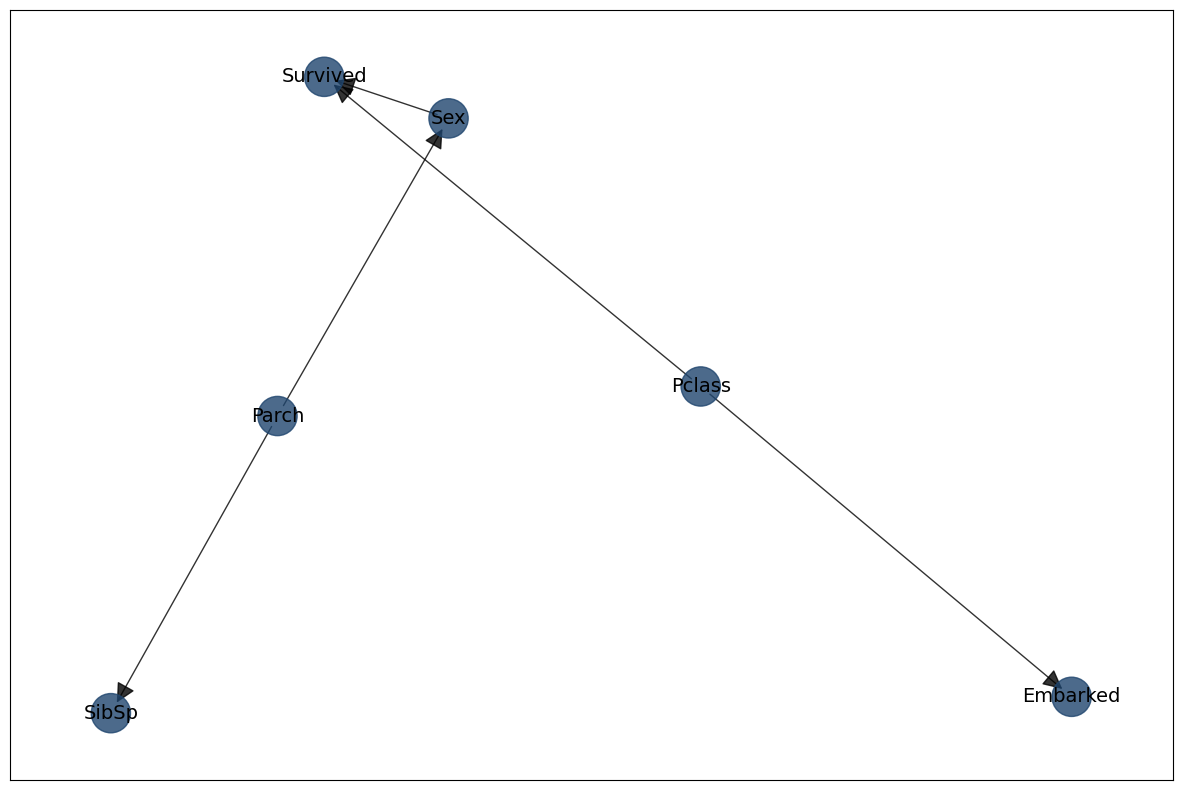

In [12]:
G = bn.plot(centralized_model, interactive=False)

In [13]:
for key in centralized_CPDs:
  print(centralized_CPDs[key])

   Pclass         p
0       1  0.295942
1       2  0.292118
2       3  0.411940
    Embarked  Pclass         p
0          0       1  0.181622
1          0       2  0.181818
2          0       3  0.128932
3          1       1  0.278536
4          1       2  0.212364
5          1       3  0.197009
6          2       1  0.183776
7          2       2  0.188364
8          2       3  0.192367
9          3       1  0.356066
10         3       2  0.417455
11         3       3  0.481692
    Survived  Pclass  Sex         p
0          0       1    0  0.377644
1          0       1    1  0.559508
2          0       2    0  0.393846
3          0       2    1  0.605517
4          0       3    0  0.511780
5          0       3    1  0.718298
6          1       1    0  0.622356
7          1       1    1  0.440492
8          1       2    0  0.606154
9          1       2    1  0.394483
10         1       3    0  0.488220
11         1       3    1  0.281702
   Sex  Parch         p
0    0      0  0.505837
1

#### Train the decentralized models

In [14]:
l = []
sizes = []
bn_models=[]
cpds=[]

for i, data in enumerate(split_data_list):
    model_ = bn.parameter_learning.fit(model, data)
    CPDs = bn.print_CPD(model_)
    bn_models.append(model_)
    cpds.append(CPDs)
    sizes.append(len(data))

    for key in CPDs:
      cpd_ = CPDs[key]
      cpd_['Count'] = cpd_['p'] * len(data)
      cpd_['Count'] = np.floor(cpd_['Count']).astype(int)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Pclass:
+-----------+----------+
| Pclass(1) | 0.311204 |
+-----------+----------+
| Pclass(2) | 0.317087 |
+-----------+----------+
| Pclass(3) | 0.371709 |
+-----------+----------+
[bnlearn] >CPD of Embarked:
+-------------+--------------------+---------------------+---------------------+
| Pclass      | Pclass(1)          | Pclass(2)           | Pclass(3)           |
+-------------+--------------------+---------------------+---------------------+
| Embarked(1) | 0.3351335133513351 | 0.3077149587750294  | 0.28510424516453153 |
+-------------+--------------------+---------------------+---------------------+
| Embarked(2) | 0.3027302730273027 | 0.29711425206124853 | 0.2941471991961818  |
+-------------+--------------------+---------------------+---------------------+
| Embarked

In [15]:
for cpd in cpds:
  print(cpd.keys())

dict_keys(['Pclass', 'Embarked', 'Survived', 'Sex', 'Parch', 'SibSp'])
dict_keys(['Pclass', 'Embarked', 'Survived', 'Sex', 'Parch', 'SibSp'])
dict_keys(['Pclass', 'Embarked', 'Survived', 'Sex', 'Parch', 'SibSp'])


In [17]:
network_variables = ['Pclass', 'Embarked', 'Survived', 'Sex', 'Parch', 'SibSp']

aggregated_cpts = dict()

for key in network_variables:
  for cpd in cpds:
    print(cpd[key])
  print("#####################################################################")

   Pclass         p  Count
0       1  0.311204     59
1       2  0.317087     60
2       3  0.371709     70
   Pclass         p  Count
0       1  0.313725     59
1       2  0.316246     60
2       3  0.370028     70
   Pclass         p  Count
0       1  0.325764     61
1       2  0.312307     59
2       3  0.361929     68
#####################################################################
   Embarked  Pclass         p  Count
0         1       1  0.335134     63
1         1       2  0.307715     58
2         1       3  0.285104     54
3         2       1  0.302730     57
4         2       2  0.297114     56
5         2       3  0.294147     55
6         3       1  0.362136     68
7         3       2  0.395171     75
8         3       3  0.420749     79
   Embarked  Pclass         p  Count
0         1       1  0.343155     65
1         1       2  0.308533     58
2         1       3  0.284128     53
3         2       1  0.300298     57
4         2       2  0.300561     57
5         2   

#### Reconstruct the CPTs for the aggregated model

In [18]:
network_variables = ['Pclass', 'Embarked', 'Survived', 'Sex', 'Parch', 'SibSp']

aggregated_cpts = dict()

for key in network_variables:
  aggregated_cpts[key] = cpds[0][key].copy()
  aggregated_cpts[key]['Count'] = int(0)
  aggregated_cpts[key] = aggregated_cpts[key].drop('p', axis=1)

  for cpd in cpds:
    aggregated_cpts[key]['Count'] += cpd[key]['Count']

  aggregated_cpts[key]['p'] = aggregated_cpts[key]['Count']/len(dfnum)

  print(aggregated_cpts[key])

   Pclass  Count         p
0       1    179  0.314587
1       2    179  0.314587
2       3    208  0.365554
   Embarked  Pclass  Count         p
0         1       1  169.0  0.297012
1         1       2  158.0  0.277680
2         1       3  143.0  0.251318
3         2       1  162.0  0.284710
4         2       2  157.0  0.275923
5         2       3  150.0  0.263620
6         3       1  175.0  0.307557
7         3       2  191.0  0.335677
8         3       3  203.0  0.356766
    Survived  Pclass  Sex  Count         p
0          0       1    0    256  0.449912
1          0       1    1    297  0.521968
2          0       2    0    260  0.456942
3          0       2    1    308  0.541301
4          0       3    0    286  0.502636
5          0       3    1    350  0.615114
6          1       1    0    310  0.544815
7          1       1    1    269  0.472759
8          1       2    0    306  0.537786
9          1       2    1    258  0.453427
10         1       3    0    281  0.493849
11    

In [19]:
centralized_CPDs.keys()

dict_keys(['Pclass', 'Embarked', 'Survived', 'Sex', 'Parch', 'SibSp'])

In [20]:
list_of_p = {}

for key in centralized_CPDs.keys():
  list_of_p[key] = aggregated_cpts[key]['p'].tolist()
  print(key , ": " , list_of_p[key])

Pclass :  [0.3145869947275923, 0.3145869947275923, 0.3655536028119508]
Embarked :  [0.29701230228471004, 0.27768014059753954, 0.2513181019332162, 0.28471001757469244, 0.2759226713532513, 0.26362038664323373, 0.30755711775043937, 0.335676625659051, 0.35676625659050965]
Survived :  [0.44991212653778556, 0.5219683655536028, 0.45694200351493847, 0.5413005272407733, 0.5026362038664324, 0.6151142355008787, 0.5448154657293497, 0.4727592267135325, 0.5377855887521968, 0.45342706502636204, 0.4938488576449912, 0.37961335676625657]
Sex :  [0.4991212653778559, 0.4165202108963093, 0.492091388400703, 0.5061511423550088, 0.4956063268892794, 0.5782073813708261, 0.5026362038664324, 0.48857644991212656]
Parch :  [0.20913884007029876, 0.3286467486818981, 0.22847100175746923, 0.22144112478031636]
SibSp :  [0.1634446397188049, 0.10193321616871705, 0.14762741652021089, 0.1634446397188049, 0.16695957820738136, 0.39015817223198596, 0.1757469244288225, 0.17223198594024605, 0.16695957820738136, 0.170474516695957

In [21]:
for key in centralized_CPDs.keys():
  print(key , ": " , aggregated_cpts[key].columns)

Pclass :  Index(['Pclass', 'Count', 'p'], dtype='object')
Embarked :  Index(['Embarked', 'Pclass', 'Count', 'p'], dtype='object')
Survived :  Index(['Survived', 'Pclass', 'Sex', 'Count', 'p'], dtype='object')
Sex :  Index(['Sex', 'Parch', 'Count', 'p'], dtype='object')
Parch :  Index(['Parch', 'Count', 'p'], dtype='object')
SibSp :  Index(['SibSp', 'Parch', 'Count', 'p'], dtype='object')


In [22]:
def divide_list(lst, n):
    return np.array_split(lst, n)

In [23]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete.CPD import TabularCPD

aggregated_model = BayesianNetwork([('SibSp', 'Parch'), ('Sex', 'Parch'), ('Sex', 'Parch'), ('Survived', 'Pclass'), ('Survived', 'Sex'), ('Embarked', 'Pclass')])

Pclass_cpd = TabularCPD('Pclass', 3, divide_list(list_of_p['Pclass'], n=3))

Embarked_cpd = TabularCPD('Embarked', 3, divide_list(list_of_p['Embarked'], n=3),
                        evidence=['Pclass'], evidence_card=[3])

Survived_cpd = TabularCPD('Survived', 2, divide_list(list_of_p['Survived'], n=2),
                        evidence=['Pclass', 'Sex'], evidence_card=[3, 2])

SibSp_cpd = TabularCPD('SibSp', 6, divide_list(list_of_p['SibSp'], n=6),
                        evidence=['Parch'], evidence_card=[4])

Sex_cpd = TabularCPD('Sex', 2, divide_list(list_of_p['Sex'], n=2),
                        evidence=['Parch'], evidence_card=[4])

Parch_cpd = TabularCPD('Parch', 4, divide_list(list_of_p['Parch'], n=4))

aggregated_model.add_cpds(Pclass_cpd)
aggregated_model.add_cpds(Embarked_cpd)
aggregated_model.add_cpds(Survived_cpd)
aggregated_model.add_cpds(SibSp_cpd)
aggregated_model.add_cpds(Sex_cpd)
aggregated_model.add_cpds(Parch_cpd)

#### Performance of Centralized vs Decentralized Model

In [24]:
from pgmpy.metrics import correlation_score

In [25]:
print(correlation_score(centralized_model['model'], test_df, test="chi_square", significance_level=0.05))

0.7499999999999999


In [26]:
print(correlation_score(aggregated_model, test_df, test="chi_square", significance_level=0.05))

0.8235294117647058
